In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


DATA CLENAING

In [2]:
df.shape

(11251, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(["Status", "unnamed1"], axis = 1, inplace=True)

In [5]:
# df.isnull()
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
# df.shape
df.dropna(inplace=True)
df.shape

(11239, 13)

In [7]:
df["Amount"] = df["Amount"].astype("int")


In [8]:
df["Amount"].dtypes

dtype('int32')

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


DATA ANALYSIS (EDA)

1. Gender - Amount:

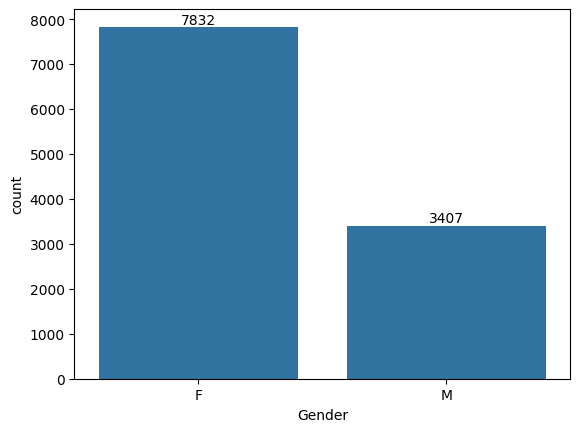

In [10]:
gender_plot = sns.countplot(x = "Gender", data=df)

for bar in gender_plot.containers:
    gender_plot.bar_label(bar)

<Axes: xlabel='Gender', ylabel='Amount'>

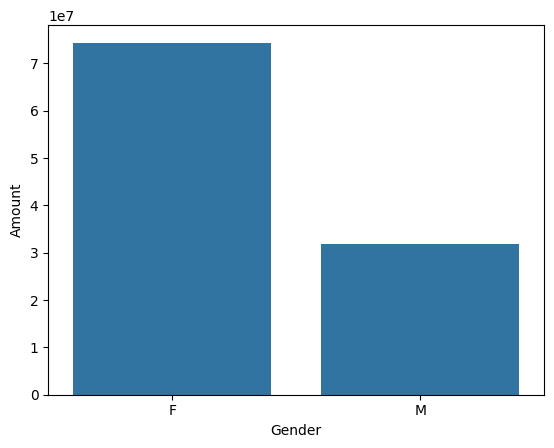

In [11]:
sales_gender = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.barplot(x = "Gender", y = "Amount", data = sales_gender)

# from the given graphs we can concludes that females do 2.3 times shopping than males.

2. Age - Amount:

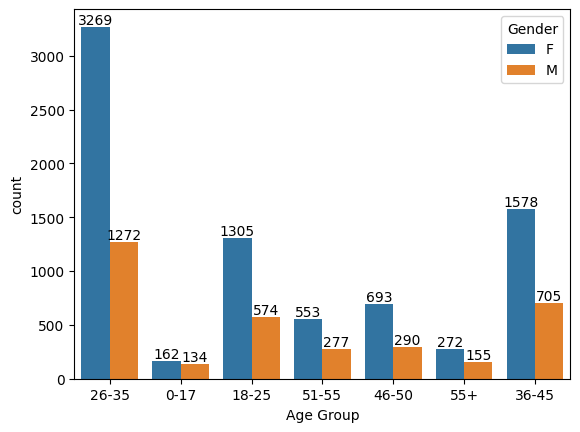

In [12]:
age_plot = sns.countplot(x = "Age Group",hue = "Gender" , data=df)

for bar in age_plot.containers:
    age_plot.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

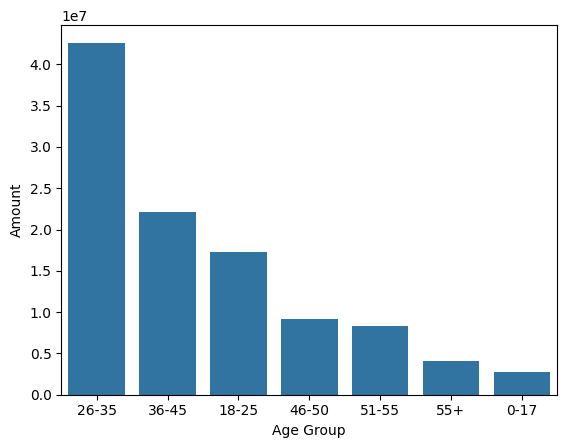

In [13]:
sales_age = df.groupby(["Age Group"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.barplot(x = "Age Group", y = "Amount", data = sales_age)

# from the two graphs we can conclude that most buyer are of age between 26-35.
# and in that age range female buyer 2.6 times greater.

3. State - Order & Amount:

<Axes: xlabel='State', ylabel='Orders'>

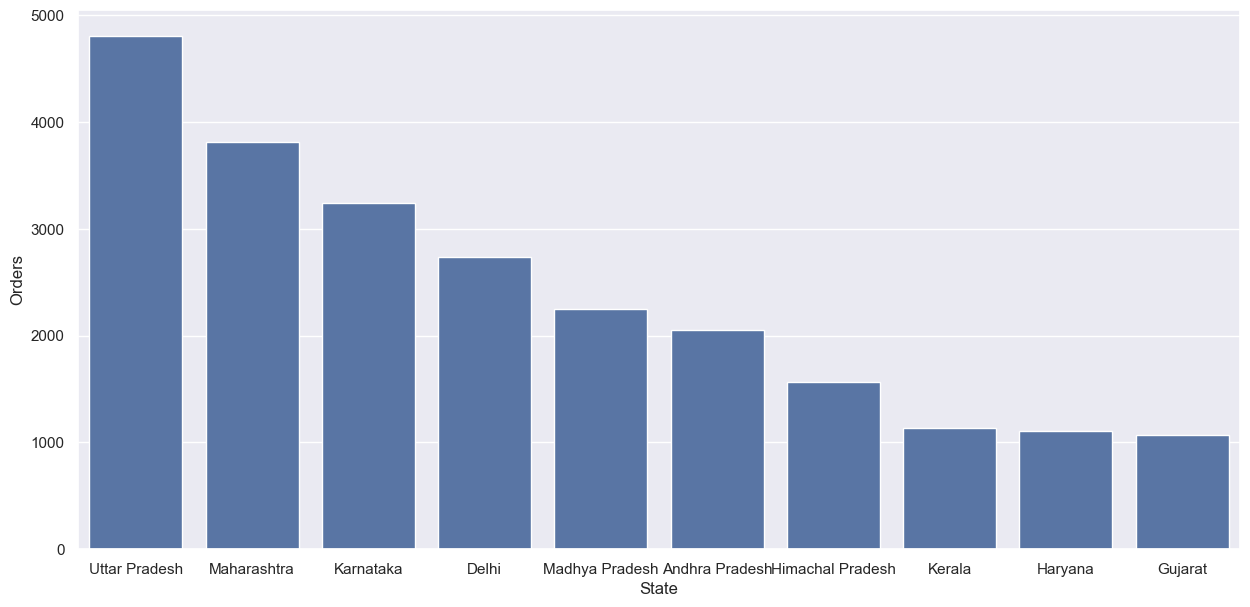

In [18]:
sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,7)})
sns.barplot(x = "State", y = "Orders", data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

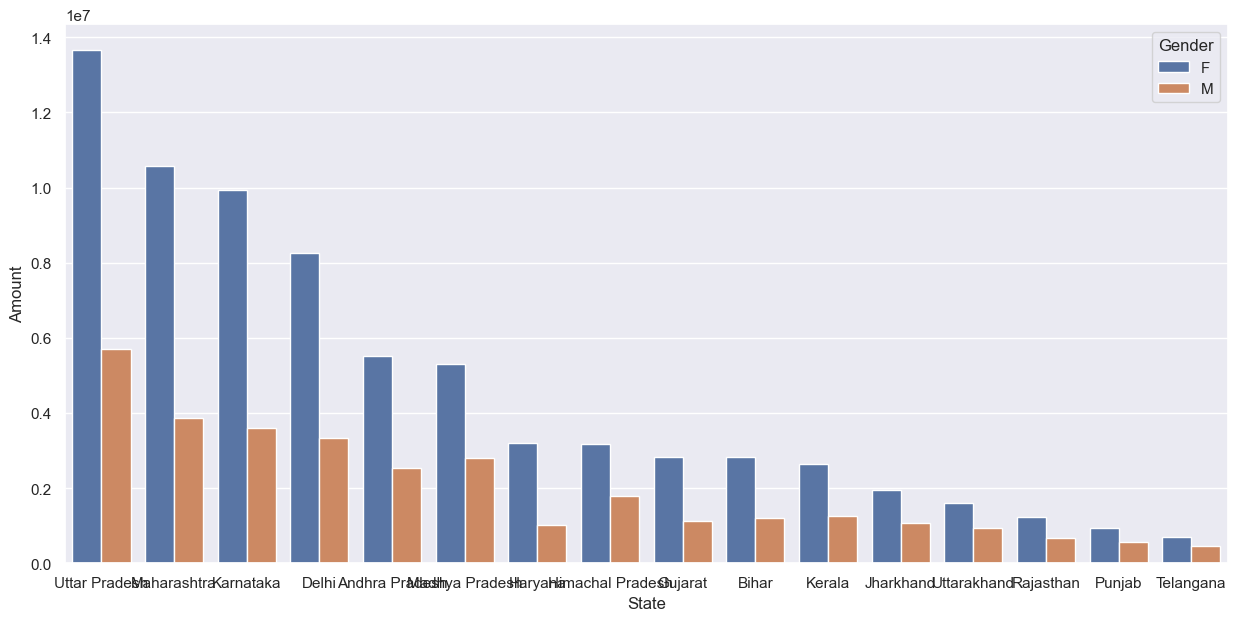

In [38]:
sales_state = df.groupby(["State", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(15,7)})
sns.barplot(x = "State", y = "Amount", data = sales_state, hue="Gender")

<Axes: xlabel='State', ylabel='Amount'>

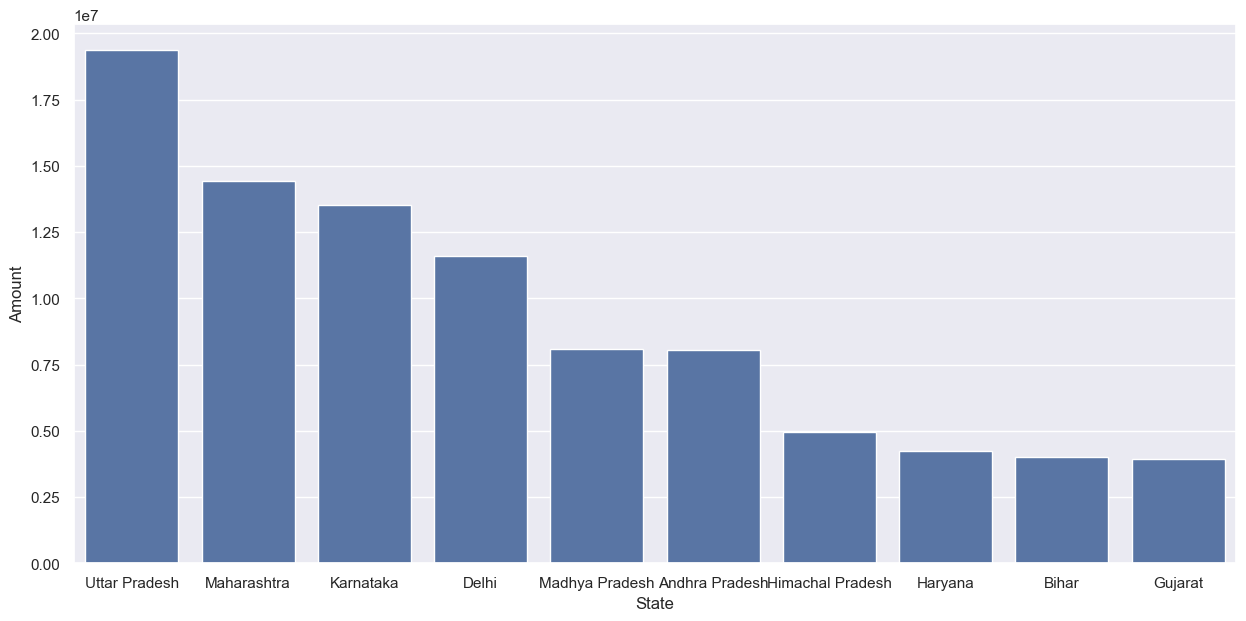

In [27]:
sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,7)})
sns.barplot(x = "State", y = "Amount", data = sales_state)

# from the data we can say that, most sales is in Uttar Pradesh, then Maharashtra, then karnataka and then other

4. Marital Status - Amount:

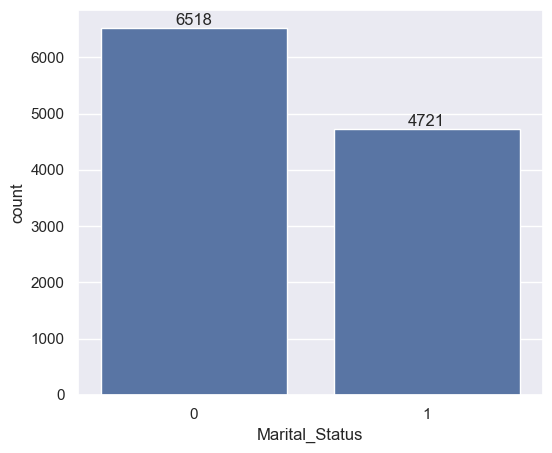

In [23]:
marital_plot = sns.countplot(x = "Marital_Status", data=df)

sns.set(rc={"figure.figsize":(6,5)})
for bar in marital_plot.containers:
    marital_plot.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

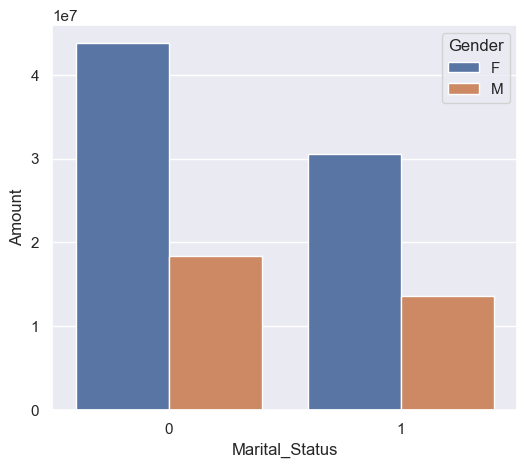

In [30]:
sales_marital = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(x = "Marital_Status", y = "Amount", data = sales_marital, hue = "Gender")

# From the graph, we can conclude that married female are greater purchaiser.

5. Occupation - Amount:

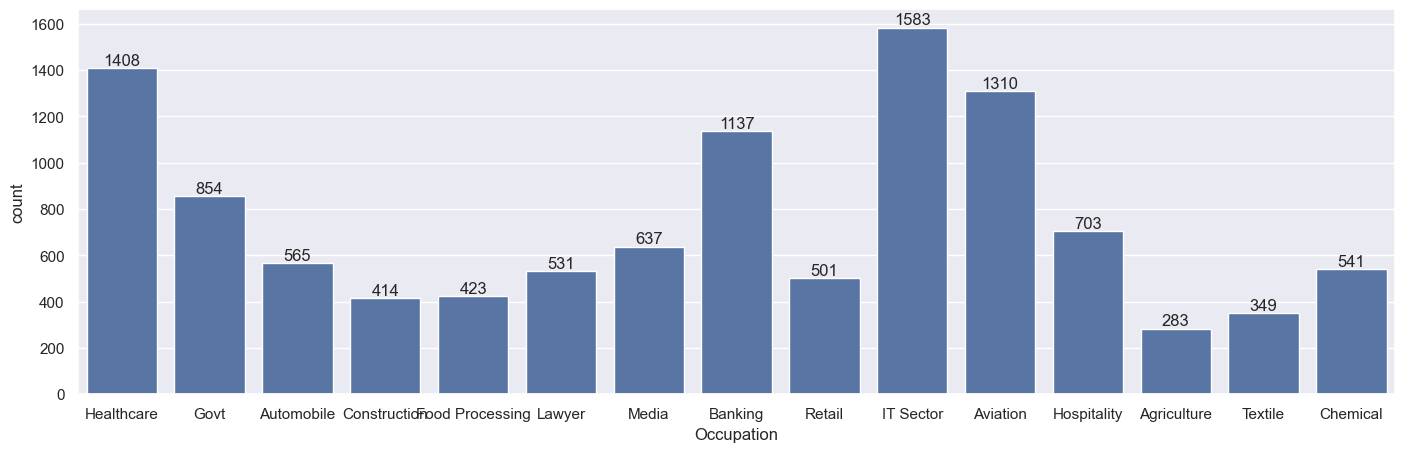

In [33]:
occupation_plot = sns.countplot(x = "Occupation", data=df)

sns.set(rc={"figure.figsize":(17,5)})
for bar in occupation_plot.containers:
    occupation_plot.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

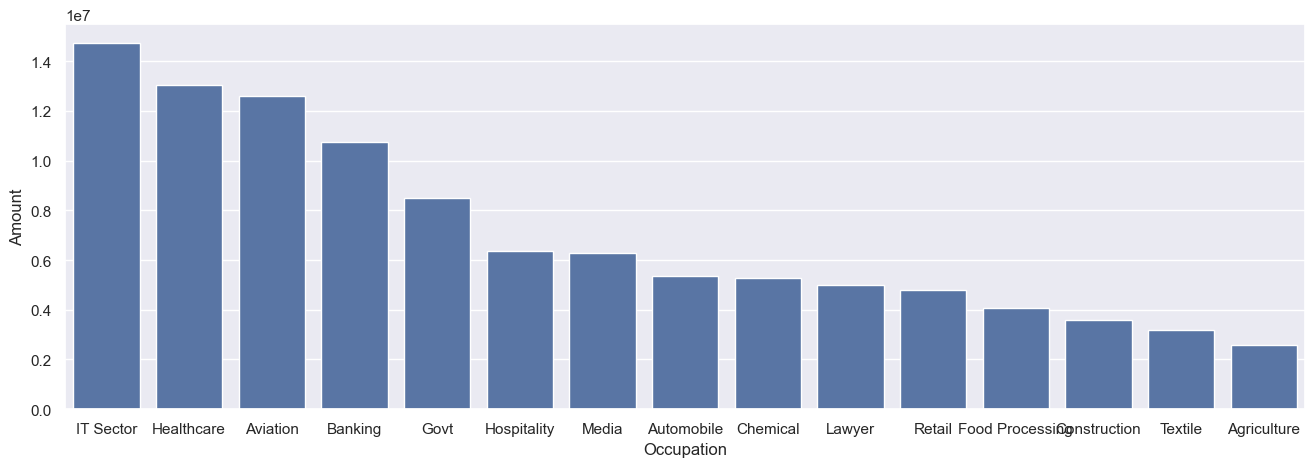

In [35]:
sales_occupation = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(16,5)})
sns.barplot(x = "Occupation", y = "Amount", data = sales_occupation)

<Axes: xlabel='Occupation', ylabel='Amount'>

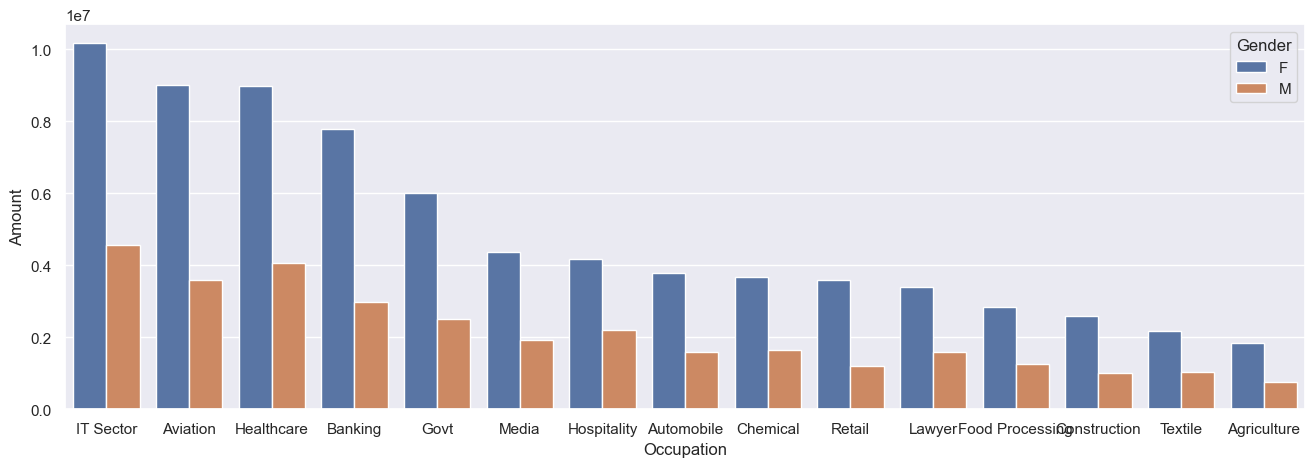

In [36]:
sales_occupation = df.groupby(["Occupation", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(16,5)})
sns.barplot(x = "Occupation", y = "Amount", data = sales_occupation, hue="Gender")

# From the graph, we can conclude that maximum sales is of IT Sector, then healthcare, then aviation and the others.

6. Product Category - Amount:

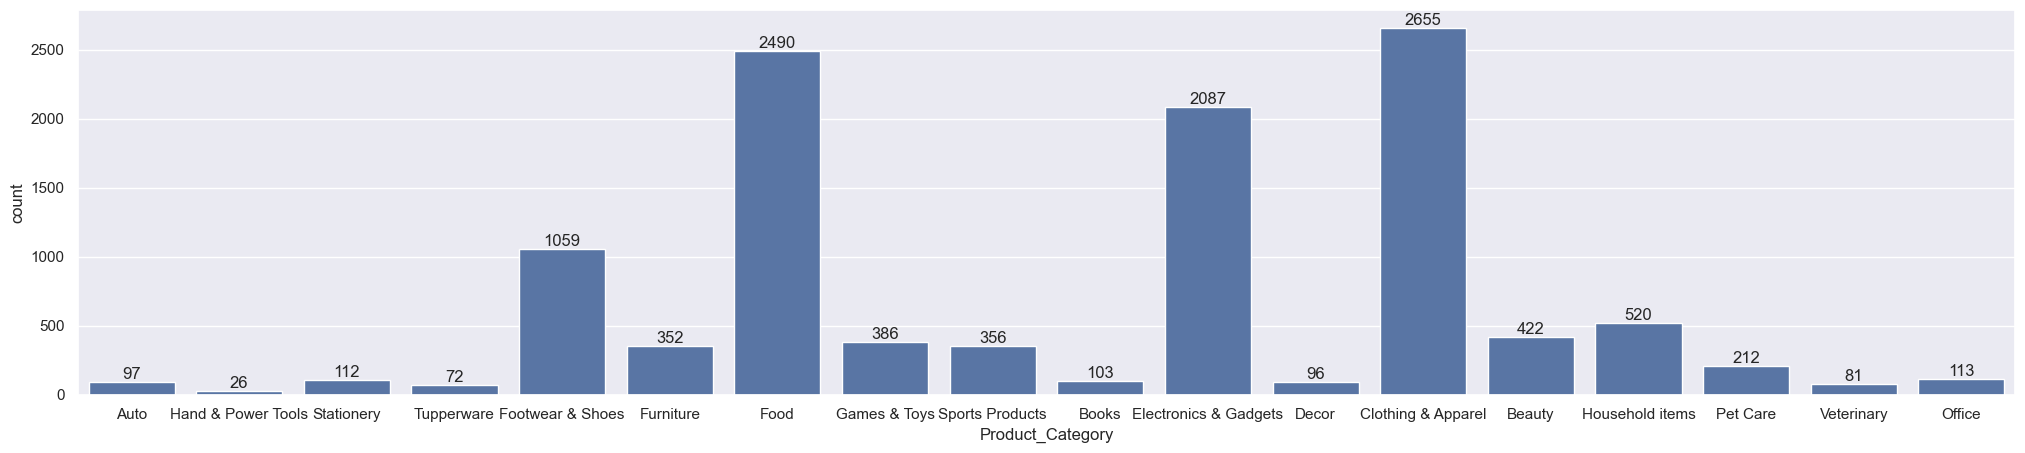

In [42]:
product_plot = sns.countplot(x = "Product_Category", data=df)

sns.set(rc={"figure.figsize":(30,5)})
for bar in product_plot.containers:
    product_plot.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

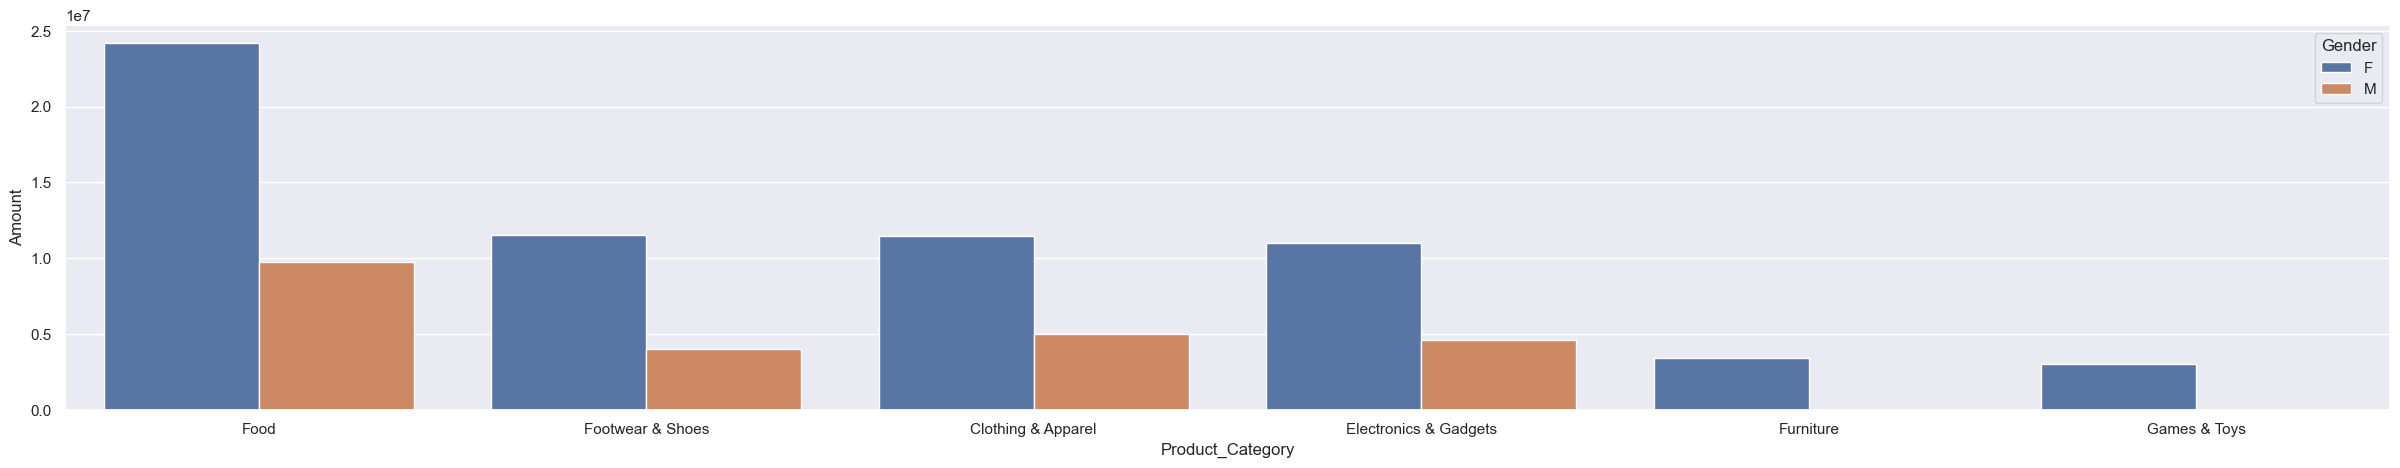

In [46]:
sales_product = df.groupby(["Product_Category", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(x = "Product_Category", y = "Amount", data = sales_product, hue="Gender")

<Axes: xlabel='Product_Category', ylabel='Amount'>

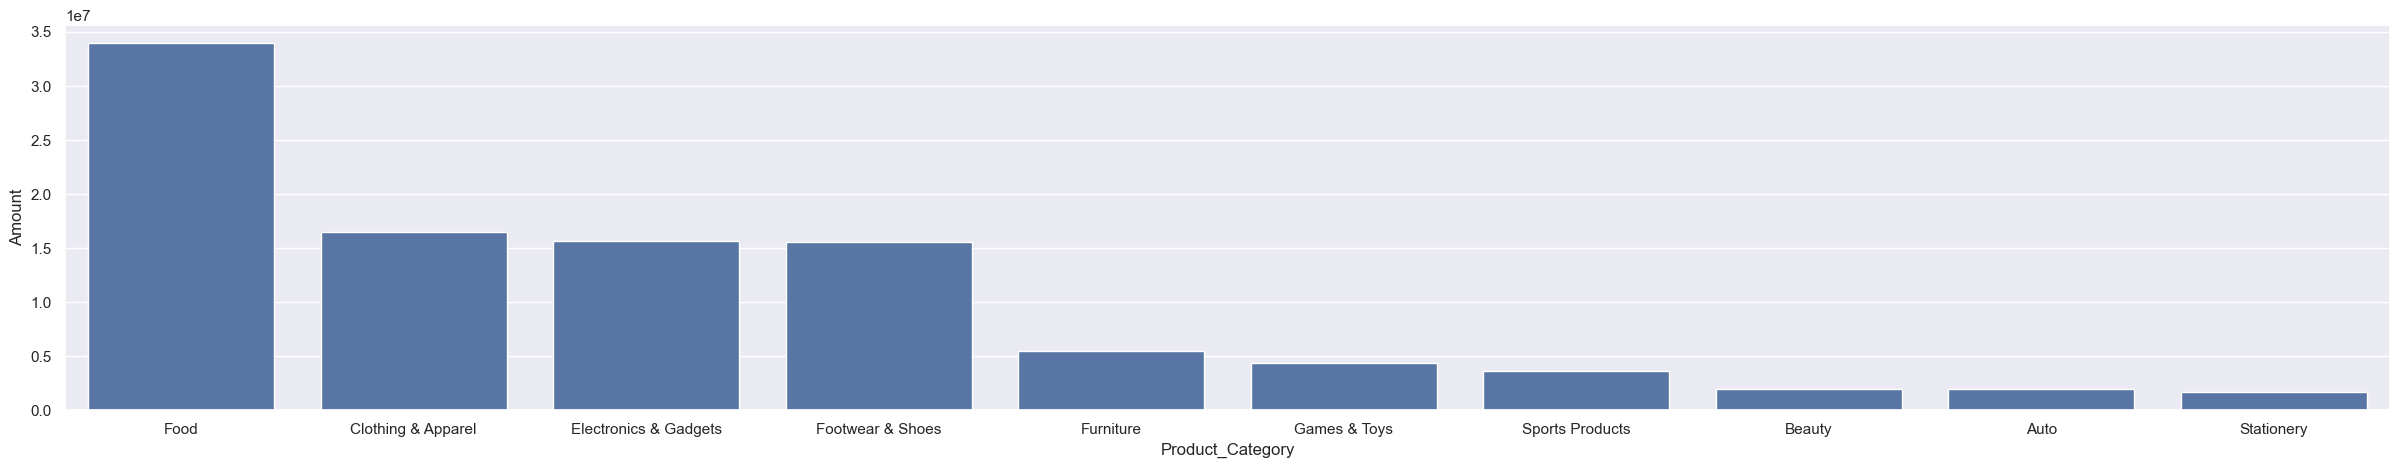

In [47]:
sales_product = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(x = "Product_Category", y = "Amount", data = sales_product)

# From the graphs, we can conclude that maximum sales is of Food, than clothing, then electronics and then other products.

7. Product ID - Amount:

<Axes: xlabel='Product_ID', ylabel='Orders'>

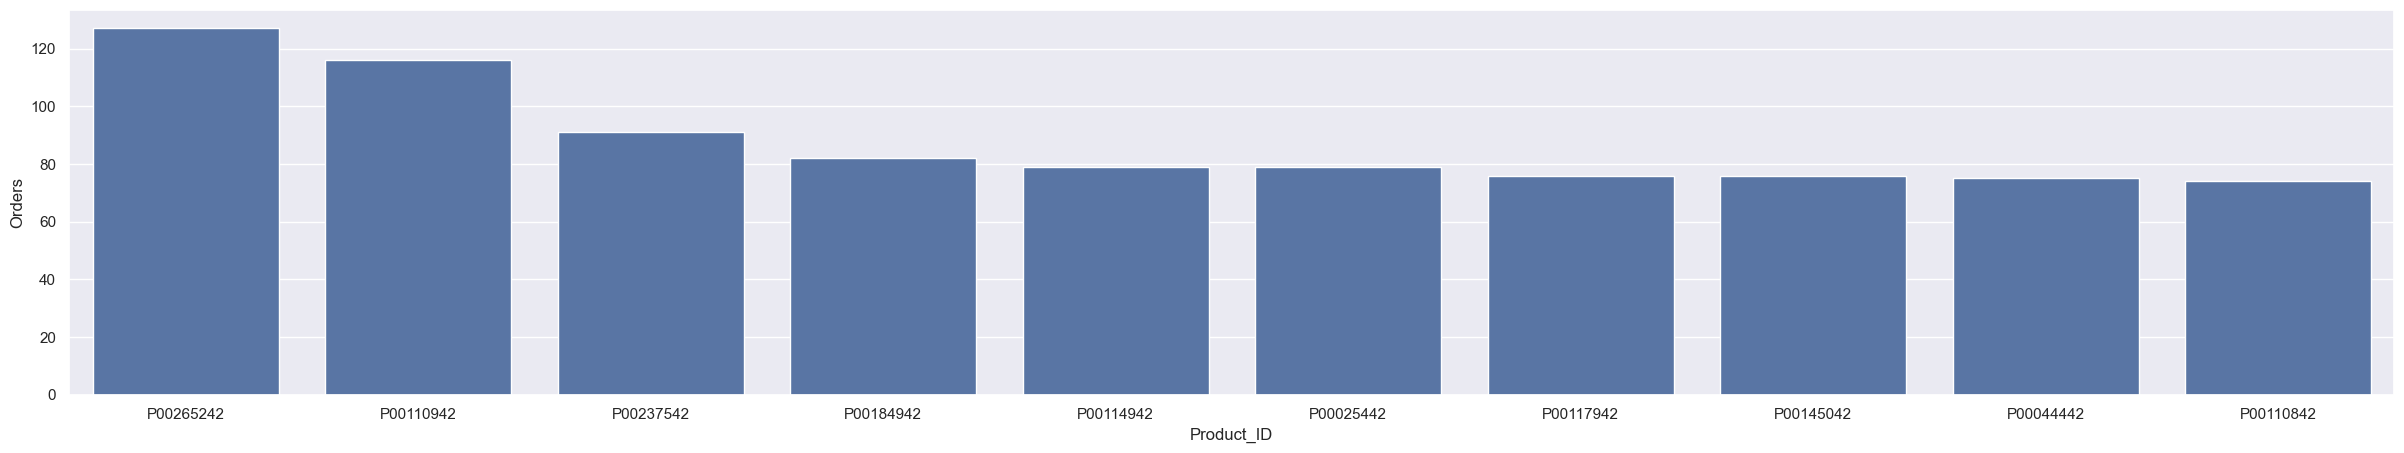

In [48]:
sales_ID = df.groupby(["Product_ID"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(x = "Product_ID", y = "Orders", data = sales_ID)

CONCLUSION:

1. Females do 2.3 times shopping than males in general.
2. Most buyer are of age between 26-35.
3. Most sales is in Uttar Pradesh, then Maharashtra, then karnataka and then other states.
4. Married female are greater purchaiser.
5. Maximum sales is of IT Sector, then healthcare, then aviation and the others.
6. Maximum sales is of Food, than clothing, then electronics and then other products.
